* Figure 8. Performance of different Opportunity sensor sensor subsets (a) and (b)
* Table 6. Model mean F1 score without nulls (F_(1w,nn)) for different sensor subset 

In [1]:
%pylab inline
import pickle
import glob
import os
import pandas as pd
import numpy as np
import sys
from scipy.special import softmax

sys.path.insert(0, ".")

import seaborn as sns

sns.set()
sns.set_style("whitegrid")
sns.set_context("paper")


def pd_full(rows=100):
    pd.set_option("display.max_rows", rows)
    pd.set_option("display.max_columns", None)
    pd.set_option("display.width", 2000)
    pd.set_option("display.float_format", "{:20,.3f}".format)
    pd.set_option("display.max_colwidth", None)


pd_full()

Duplicate key in file '/home/ubuntu/.config/matplotlib/matplotlibrc' line #2.
Duplicate key in file '/home/ubuntu/.config/matplotlib/matplotlibrc' line #3.


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load relevant experiment script
import scripts.run_mm_base_configs_exp as exp
from training.evalmodel import *

In [3]:
# Load saved models produced by script.
model_dirs = [os.path.split(p)[0] for p in glob.glob(exp.saved_model_glob)]

In [4]:
# Create dataframe summary of model results
df_run_records = []

for i, model_dir in enumerate(model_dirs):
    print(f"{i}/{len(model_dirs)}")

    em = load_eval_model_from_dir(model_dir)

    if hasattr(em.trainer, "trainers"):
        # ensemble:
        trainer = em.trainer.trainers[0]
        pre = "ens_"
    else:
        trainer = em.trainer
        pre = ""

    df = trainer.train_state.to_df()
    s = df.loc[trainer.cp_iter]

    df_run_records.append(
        {
            "model_dir": model_dir,
            "base_config": pre + trainer.base_config,
            "sensor_subset": trainer.sensor_subset,
            "loss": s.val_loss,
            "f1w": em.f1,
            "f1m": em.f1_mean,
            "f1w_nn": em.nonull_f1,
            "event_f1": em.event_f1,  
            "t_infer": em.infer_time_s_wall,
            "ksamp_per_s": em.infer_samples_per_s / 1000,
            "train_iter_s": df.iter_s_cpu.mean(),
            "cp_iter": trainer.cp_iter,
            "train_s": trainer.cp_iter * df.iter_s_cpu.mean(),
        }
    )

0/150
1/150
2/150
3/150
4/150
5/150
6/150
7/150
8/150
9/150
10/150
11/150
12/150
13/150
14/150
15/150
16/150
17/150
18/150
19/150
20/150
21/150
22/150
23/150
24/150
25/150
26/150
27/150
28/150
29/150
30/150
31/150
32/150
33/150
34/150
35/150
36/150
37/150
38/150
39/150
40/150
41/150
42/150
43/150
44/150
45/150
46/150
47/150
48/150
49/150
50/150
51/150
52/150
53/150
54/150
55/150
56/150
57/150
58/150
59/150
60/150
61/150
62/150
63/150
64/150
65/150
66/150
67/150
68/150
69/150
70/150
71/150
72/150
73/150
74/150
75/150
76/150
77/150
78/150
79/150
80/150
81/150
82/150
83/150
84/150
85/150
86/150
87/150
88/150
89/150
90/150
91/150
92/150
93/150
94/150
95/150
96/150
97/150
98/150
99/150
100/150
101/150
102/150
103/150
104/150
105/150
106/150
107/150
108/150
109/150
110/150
111/150
112/150
113/150
114/150
115/150
116/150
117/150
118/150
119/150
120/150
121/150
122/150
123/150
124/150
125/150
126/150
127/150
128/150
129/150
130/150
131/150
132/150
133/150
134/150
135/150
136/150
137/150
138/15

In [5]:
df_run_records = pd.DataFrame(df_run_records)
df_run_records

,model_dir,base_config,sensor_subset,loss,f1w,f1m,f1w_nn,event_f1,t_infer,ksamp_per_s,train_iter_s,cp_iter,train_s
0,saved_models/mm_base_configs_2_multi_scale_cnn_lstm_gyros_2,multi_scale_cnn_lstm,gyros,0.323,0.916,0.678,0.853,0.782,0.128,"1,852.689",4.701,55,258.577
1,saved_models/mm_base_configs_2_multi_scale_cnn_lstm_accels_3,multi_scale_cnn_lstm,accels,0.273,0.921,0.655,0.830,0.796,0.128,"1,845.039",4.708,73,343.648
2,saved_models/mm_base_configs_2_4_folds_gyros_2,ens_multi_scale_cnn_lstm,gyros,0.469,0.921,0.678,0.860,0.797,0.592,399.492,4.686,26,121.842
3,saved_models/mm_base_configs_2_multi_scale_cnn_accels+gyros+magnetic_4,multi_scale_cnn,accels+gyros+magnetic,0.269,0.929,0.729,0.881,0.791,0.148,"1,595.194",3.209,55,176.514
4,saved_models/mm_base_configs_2_multi_scale_cnn_accels+gyros_2,multi_scale_cnn,accels+gyros,0.272,0.927,0.699,0.859,0.779,0.129,"1,840.364",3.169,51,161.599
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,saved_models/mm_base_configs_2_multi_scale_cnn_gyros_3,multi_scale_cnn,gyros,0.344,0.908,0.629,0.812,0.706,0.107,"2,215.725",3.105,60,186.287
146,saved_models/mm_base_configs_2_base_cnn_accels+gyros+magnetic_4,base_cnn,accels+gyros+magnetic,0.293,0.901,0.636,0.806,0.669,0.131,"1,809.530",1.730,50,86.524
147,saved_models/mm_base_configs_2_multi_scale_cnn_lstm_opportunity_4,multi_scale_cnn_lstm,opportunity,0.275,0.928,0.745,0.906,0.834,0.231,"1,025.393",9.608,52,499.615
148,saved_models/mm_base_configs_2_multi_scale_cnn_opportunity_3,multi_scale_cnn,opportunity,0.300,0.927,0.728,0.892,0.782,0.220,"1,076.958",6.839,52,355.646


In [6]:
# Roll up each experiment and summarize
df_results = df_run_records.groupby(["base_config", "sensor_subset"]).mean()
df_results["n"] = df_run_records.groupby(
    ["base_config", "sensor_subset"]
).model_dir.count()
df_results

loss                  f1w                  f1m               f1w_nn             event_f1              t_infer          ksamp_per_s         train_iter_s              cp_iter              train_s  n
base_config              sensor_subset                                                                                                                                                                                                                             
base_cnn                 accels                               0.432                0.870                0.473                0.660                0.520                0.084            2,835.120                1.591               73.800              117.273  5
                         accels+gyros                         0.385                0.886                0.559                0.722                0.567                0.100            2,377.898                1.659               74.600              124.006  5
                         accels+gyros+magnetic                0.298                0.904                0.641                0.815                0.659                0.127            1,873.572                1.733               53.200               92.111  5
                         gyros                                0.512                0.858                0.455                0.615                0.504                0.080            2,941.597                1.587               55.600               88.117  5
                         opportunity                          0.347                0.899                0.621                0.798                0.625                0.187            1,275.902                4.117               53.800              225.018  5
base_lstm                accels                               0.519                0.853                0.413                0.602                0.453                0.199            1,190.570               15.313               53.200              814.282  5
                         accels+gyros                         0.433                0.882                0.522                0.694                0.528                0.209            1,132.443               15.370               55.800              857.587  5
                         accels+gyros+magnetic                0.346                0.903                0.618                0.800                0.635                0.229            1,034.381               15.464               56.800              878.123  5
                         gyros                                0.557                0.846                0.399                0.565                0.425                0.197            1,200.211               15.315               63.600              974.288  5
                         opportunity                          0.390                0.894                0.593                0.774                0.558                0.273              868.237               31.302               28.800              901.604  5
cnn_lstm                 accels                               0.314                0.912                0.613                0.824                0.758                0.104            2,263.810                3.641               75.200              273.761  5
                         accels+gyros                         0.282                0.925                0.694                0.874                0.798                0.120            1,963.654                3.722               78.200              291.306  5
                         accels+gyros+magnetic                0.257                0.930                0.724                0.897                0.843                0.141            1,674.538                3.774               55.600              209.887  5
                         gyros                                0.336                0.908                0.644                0.823                0.723            

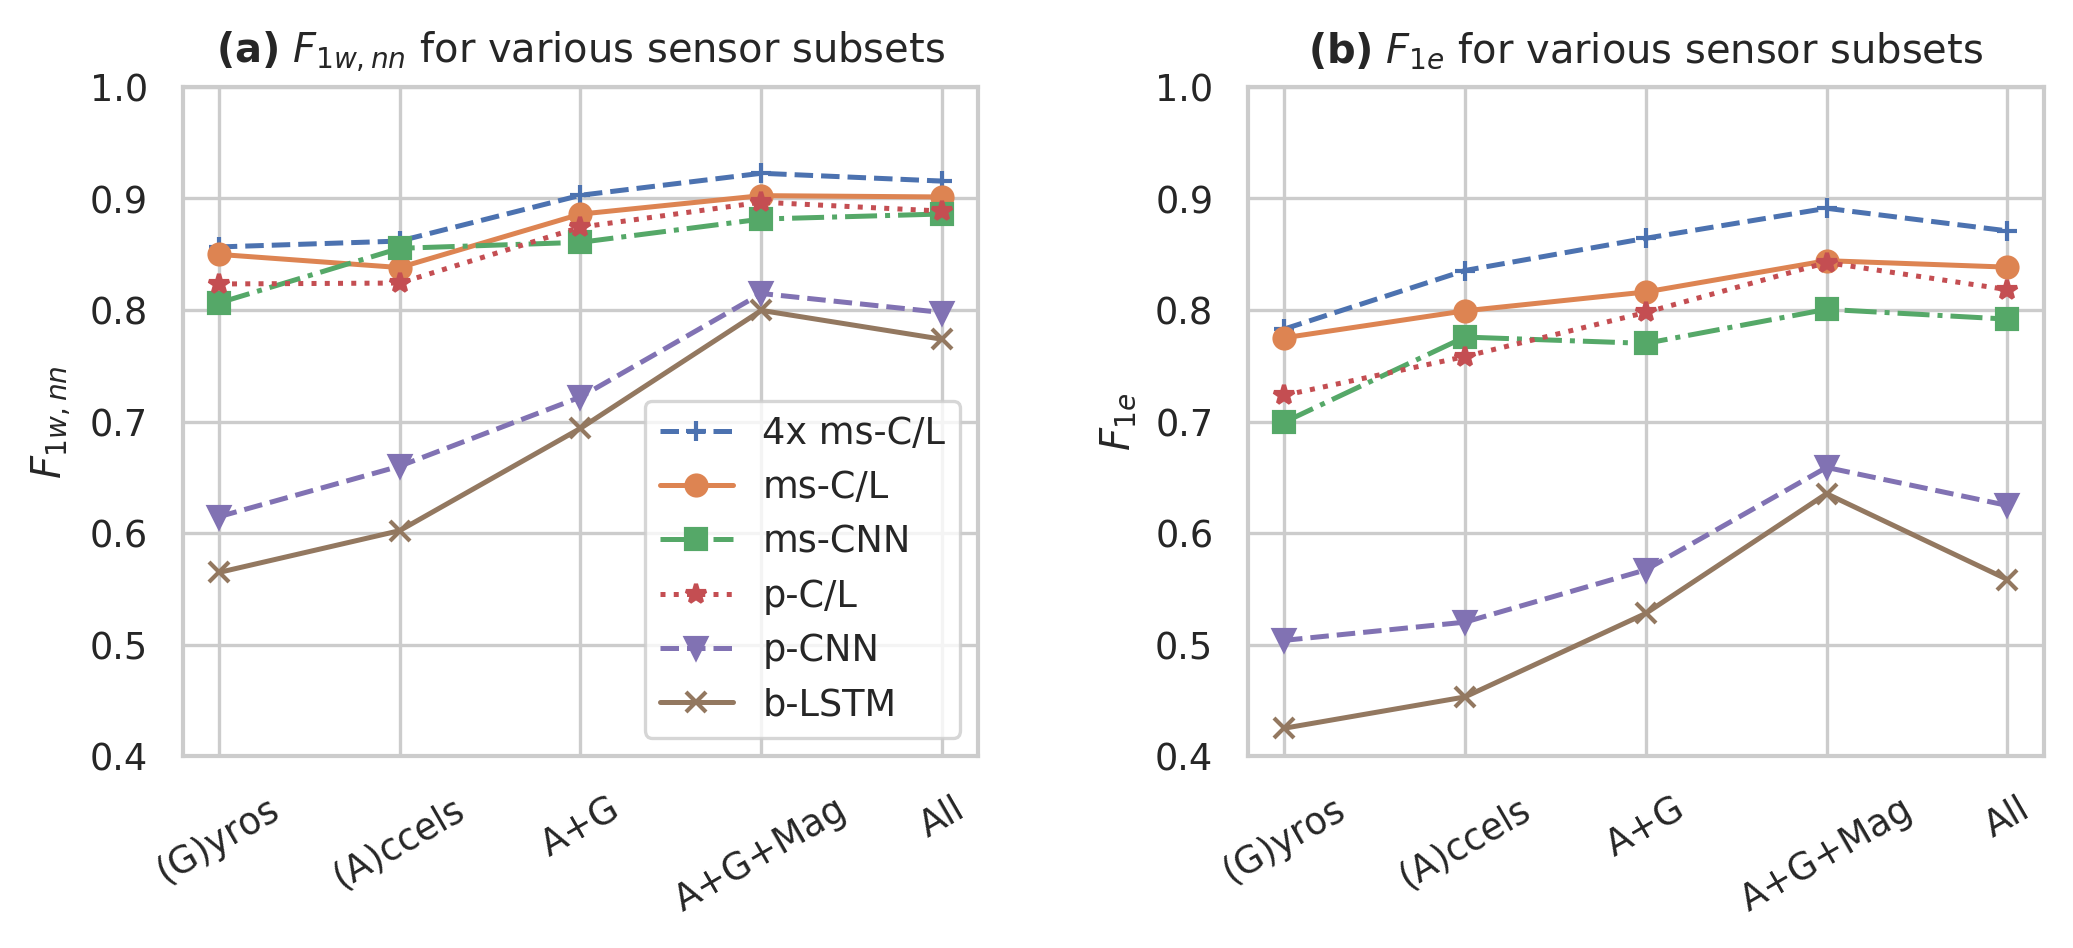

In [7]:
configs = [
    ["ens_multi_scale_cnn_lstm", "4x ms-C/L", "+--"],
    ["multi_scale_cnn_lstm", "ms-C/L", "o-"],
    ["multi_scale_cnn", "ms-CNN", "s-."],
    ["cnn_lstm", "p-C/L", "*:"],
    ["base_cnn", "p-CNN", "v--"],
    ["base_lstm", "b-LSTM", "x-"],
]
sensors_order = [
    "gyros",
    "accels",
    "accels+gyros",
    "accels+gyros+magnetic",
    "opportunity",
]

metrics = [
    #     ['f1w', 'F1 (weighted)'],
    ["f1w_nn", "$F_{1w,nn}$"],
    ["event_f1", "$F_{1e}$"],
]

panes = ["a", "b"]

f, axes = subplots(
    1, len(metrics), figsize=[3.5 * len(metrics), 3.25], dpi=300, sharex=True
)

for im, (metric, metric_name) in enumerate(metrics):
    ax = axes[im]
    sca(ax)

    for i, (base_config, model_name, style) in enumerate(configs):

        ddf = df_results.loc[base_config].loc[sensors_order]

        ax.plot(
            ddf.index,
            ddf[metric],
            style,
            color=sns.palettes.color_palette()[i],
            label=model_name,
        )

    if im == 0:
        legend(loc="lower right")
    xticks(sensors_order, ["(G)yros", "(A)ccels", "A+G", "A+G+Mag", "All"], rotation=30)
    title(f"$\\bf{{({panes[im]})}}$ " + metric_name + " for various sensor subsets")

    ylabel(metric_name)  # + ' metric value')
    ylim([0.4, 1])
#     xlabel('Sensor Subset')

tight_layout(w_pad=3)
plt.savefig('multimodal_sensor_fusion.png')
show()
# plot(df5.index, df5.event_f1, '.--', color=sns.palettes.color_palette()[1], label='Event F1')
# plot(df5.index, df5.f1_mean, '^-.', color=sns.palettes.color_palette()[2], label='F1 (mean)')

In [8]:
####
# Make table

In [9]:
base_config = "multi_scale_cnn_lstm"
sensors_order = [
    "accels",
    "gyros",
    "accels+gyros",
    "accels+gyros+magnetic",
    "opportunity",
]
ddf = df_results.loc[base_config].loc[sensors_order]
s1 = ddf.loc[:, "f1w_nn"]
s1.name = f"{base_config} f1w_nn"
s1

sensor_subset
accels                                 0.838
gyros                                  0.850
accels+gyros                           0.886
accels+gyros+magnetic                  0.903
opportunity                            0.901
Name: multi_scale_cnn_lstm f1w_nn, dtype: float64

In [10]:
base_config='base_cnn'
ddf = df_results.loc[base_config].loc[sensors_order]
s0 = ddf.loc[:,'f1w_nn']
s0.name = f"{base_config} f1w_nn"
s0

sensor_subset
accels                                 0.660
gyros                                  0.615
accels+gyros                           0.722
accels+gyros+magnetic                  0.815
opportunity                            0.798
Name: base_cnn f1w_nn, dtype: float64

In [11]:
base_config = "ens_multi_scale_cnn_lstm"
ddf = df_results.loc[base_config].loc[sensors_order]
s2 = ddf.loc[:, "f1w_nn"]
s2.name = f"{base_config} f1w_nn"
s2

sensor_subset
accels                                 0.862
gyros                                  0.857
accels+gyros                           0.903
accels+gyros+magnetic                  0.923
opportunity                            0.916
Name: ens_multi_scale_cnn_lstm f1w_nn, dtype: float64

In [12]:
# Reported DeepConvLSTM performance, from paper
s3 = s2.copy()
s3.name = "DeepConvLSTM (reported)"
s3[:] = [0.689, 0.611, 0.745, 0.839, 0.864] 
s3

sensor_subset
accels                                 0.689
gyros                                  0.611
accels+gyros                           0.745
accels+gyros+magnetic                  0.839
opportunity                            0.864
Name: DeepConvLSTM (reported), dtype: float64

In [13]:
##
# Table for paper

df = pd.DataFrame([s3, s0, s1, s2])
df.index.name = "model"
df

sensor_subset,accels,gyros,accels+gyros,accels+gyros+magnetic,opportunity
model,,,,,
DeepConvLSTM (reported),0.689,0.611,0.745,0.839,0.864
base_cnn f1w_nn,0.660,0.615,0.722,0.815,0.798
multi_scale_cnn_lstm f1w_nn,0.838,0.850,0.886,0.903,0.901
ens_multi_scale_cnn_lstm f1w_nn,0.862,0.857,0.903,0.923,0.916
